# Stock Market Analysis for Tech Stocks

In [4]:
#Python Data Analysis imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#To grab stock data
from pandas.io.data import DataReader
from datetime import datetime

#To handle floats in Python 2
from __future__ import division

/Users/sajal/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/pandas/io/data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [29]:
#We're going to analyse stock info for Apple, Google, Microsoft, and Amazon
tech_list = ['AAPL','GOOG','MSFT','AMZN','YHOO']

In [30]:
#Setting the end date to today
end = datetime.now()

#Start date set to 1 year back
start = datetime(end.year-1,end.month,end.day) 

In [32]:
#Using Yahoo Finance to grab the stock data
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end) #The globals method sets the stock name to a global variable

In [33]:
AAPL.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-09-23,113.629997,114.720001,113.300003,114.320000,35756700,111.926895
2015-09-24,113.250000,115.500000,112.370003,115.000000,50219500,112.592660
2015-09-25,116.440002,116.690002,114.019997,114.709999,56151900,112.308730
2015-09-28,113.849998,114.570000,112.440002,112.440002,52109000,110.086252
2015-09-29,112.830002,113.510002,107.860001,109.059998,73365400,106.777002


In [17]:
#Basic stats for Apple's Stock
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,104.824941,105.777510,103.881146,104.858498,4.179762e+07,103.707287
std,8.073718,8.110392,8.019398,8.075914,1.749642e+07,7.735402
min,90.000000,91.669998,89.470001,90.339996,1.304640e+07,89.853242
25%,97.320000,98.209999,96.580002,97.139999,2.944520e+07,96.348065
50%,105.519997,106.309998,104.879997,105.790001,3.695570e+07,104.701886
75%,110.629997,111.769997,109.410004,110.779999,4.896780e+07,109.220001
max,123.129997,123.820000,121.620003,122.570000,1.333697e+08,120.004194


In [20]:
#Some basic info about the dataframe
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2015-09-23 to 2016-09-22
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Volume       253 non-null int64
Adj Close    253 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


### What's the change in stock's price over time?

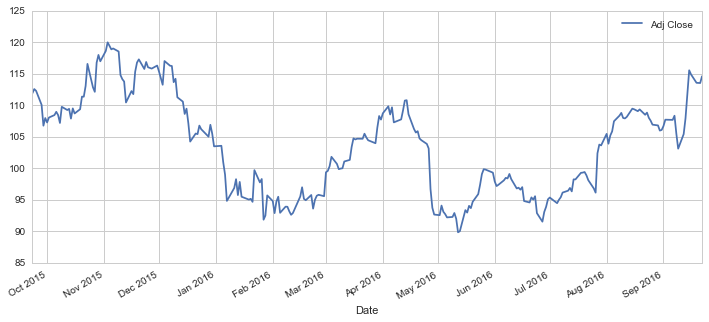

In [27]:
#Plotting the stock's adjusted closing price using pandas
AAPL['Adj Close'].plot(legend=True,figsize=(12,5))

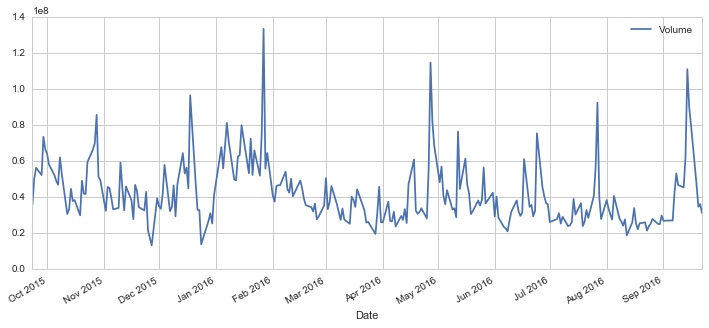

In [34]:
#Plotting the total volume being traded over time
AAPL['Volume'].plot(legend=True,figsize=(12,5))

### What was the moving average of various stocks?

In [42]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma,center=False).mean()

In [44]:
AAPL.tail()

,Open,High,Low,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2016-09-16,115.120003,116.129997,114.040001,114.919998,79886900,114.919998,108.808999,108.1500,104.992706
2016-09-19,115.190002,116.180000,113.250000,113.580002,47023000,113.580002,109.393999,108.3610,105.341124
2016-09-20,113.050003,114.120003,112.510002,113.570000,34514300,113.570000,109.980999,108.6140,105.683375
2016-09-21,113.849998,113.989998,112.440002,113.550003,36003200,113.550003,110.499999,108.8490,106.016473
2016-09-22,114.349998,114.940002,114.000000,114.620003,31011700,114.620003,111.410000,109.1785,106.381911


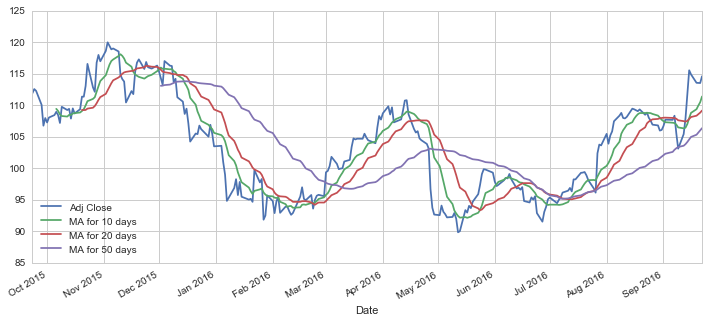

In [45]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,5))

### What was the daily return average of a stock?

In [46]:
#The daily return column can be created by using the percentage change over the adjusted closing price
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

In [49]:
AAPL['Daily Return'].tail()

Date
2016-09-16   -0.005624
2016-09-19   -0.011660
2016-09-20   -0.000088
2016-09-21   -0.000176
2016-09-22    0.009423
Name: Daily Return, dtype: float64

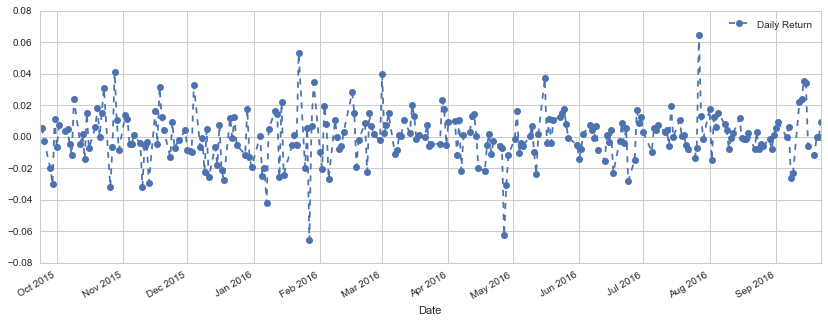

In [50]:
#Plotting the daily return
AAPL['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o')

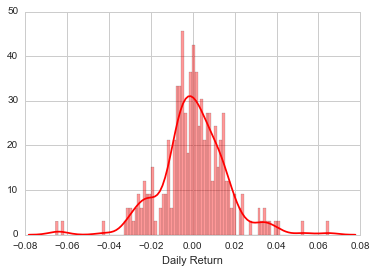

In [56]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='red')

### What was the correlation between daily returns of different stocks?

In [60]:
#Reading just the 'Adj Close' column this time
close_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [69]:
close_df.tail()

,AAPL,AMZN,GOOG,MSFT,YHOO
Date,,,,,
2016-09-16,114.919998,778.520020,768.880005,57.250000,43.669998
2016-09-19,113.580002,775.099976,765.700012,56.930000,43.189999
2016-09-20,113.570000,780.219971,771.409973,56.810001,42.790001
2016-09-21,113.550003,789.739990,776.219971,57.759998,44.139999
2016-09-22,114.620003,804.700012,787.210022,57.820000,44.150002


In [66]:
rets_df = close_df.pct_change()

In [68]:
rets_df.tail()

,AAPL,AMZN,GOOG,MSFT,YHOO
Date,,,,,
2016-09-16,-0.005624,0.011472,-0.003732,0.001049,-0.007274
2016-09-19,-0.011660,-0.004393,-0.004136,-0.005590,-0.010992
2016-09-20,-0.000088,0.006606,0.007457,-0.002108,-0.009261
2016-09-21,-0.000176,0.012202,0.006235,0.016722,0.031549
2016-09-22,0.009423,0.018943,0.014158,0.001039,0.000227


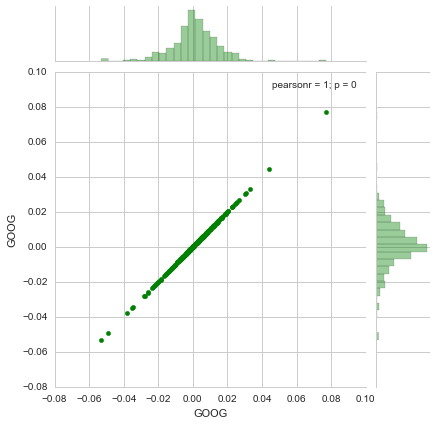

In [71]:
sns.jointplot('GOOG','GOOG',rets_df,kind='scatter',color='green')

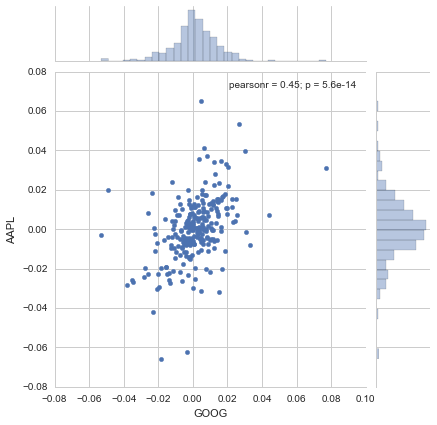

In [78]:
sns.jointplot('GOOG','AAPL',rets_df,kind='scatter')

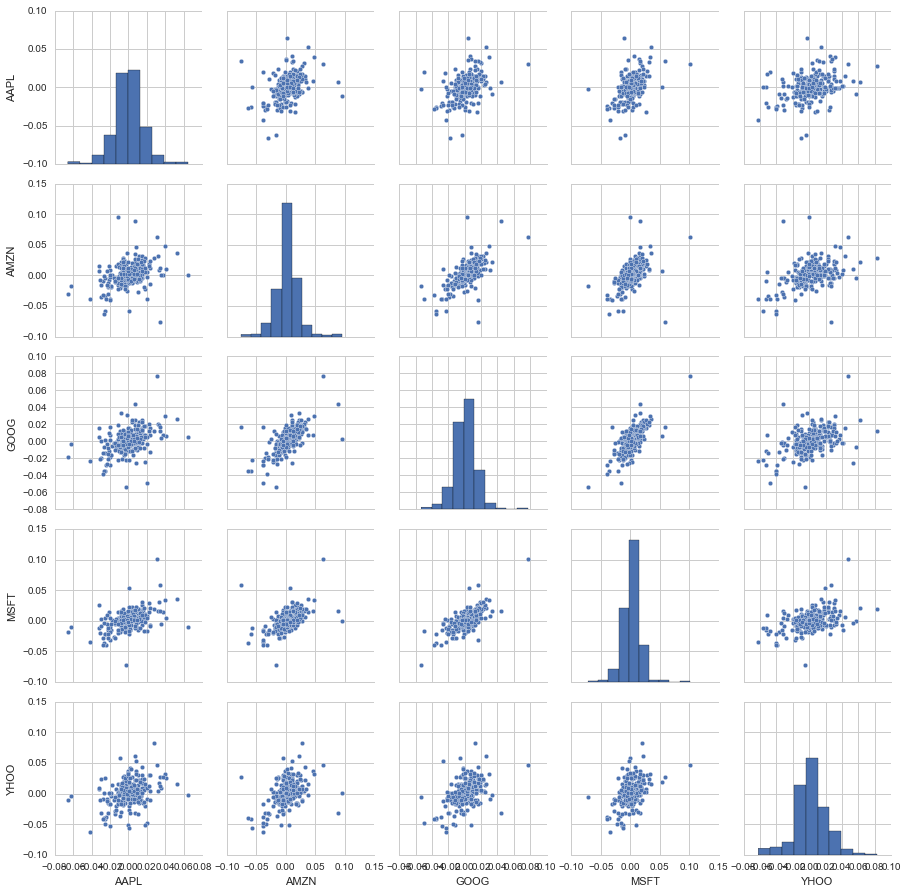

In [80]:
sns.pairplot(rets_df.dropna())

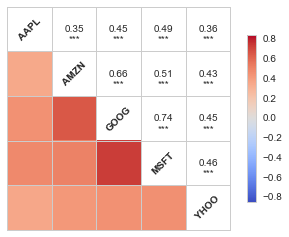

In [87]:
sns.corrplot(rets_df.dropna(),annot=True)

### How much value do we put at risk by investing in a particular stock?

In [90]:
rets = rets_df.dropna()

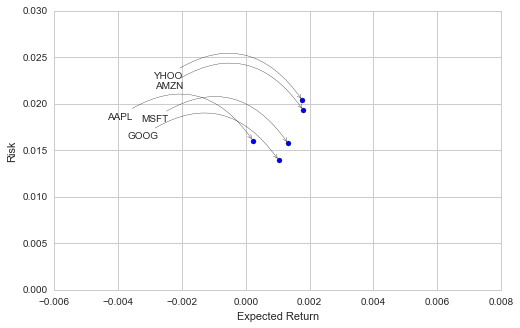

In [181]:
plt.figure(figsize=(8,5))

plt.scatter(rets.mean(),rets.std(),s=25)

plt.xlabel('Expected Return')
plt.ylabel('Risk')


#For adding annotatios in the scatterplot
for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-120,20),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=-0.5'))
    


### Value at Risk

__Bootstrap Method__


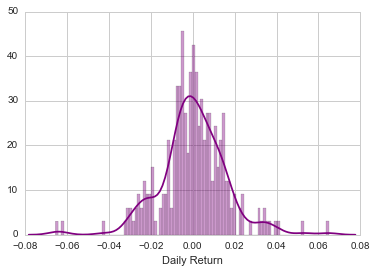

In [182]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [183]:
rets.head()

,AAPL,AMZN,GOOG,MSFT,YHOO
Date,,,,,
2015-09-24,0.005948,-0.004328,0.005527,0.000912,-0.013450
2015-09-25,-0.002522,-0.017799,-0.022100,0.000683,-0.007157
2015-09-28,-0.019789,-0.038512,-0.027910,-0.014793,-0.052523
2015-09-29,-0.030061,-0.015851,0.000134,0.003465,0.023913
2015-09-30,0.011370,0.031891,0.022606,0.018877,0.023001


In [187]:
#Using Pandas built in qualtile method
rets['AAPL'].quantile(0.05)

-0.025722813451247724

### How can we attempt to predict future stock behaviour?

__Monte Carlo Method__


In [188]:
days = 365

#delta t
dt = 1/365

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [194]:
#Function takes in stock price, number of days to run, mean and standard deviation values
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in xrange(1,days):
        
        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

In [190]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-09-23,622.049988,628.929993,620.000000,622.359985,1470900,622.359985
2015-09-24,616.640015,627.320007,612.400024,625.799988,2240100,625.799988
2015-09-25,629.770020,629.770020,611.000000,611.969971,2174000,611.969971
2015-09-28,610.340027,614.604980,589.380005,594.890015,3127700,594.890015
2015-09-29,597.280029,605.000000,590.219971,594.969971,2309500,594.969971


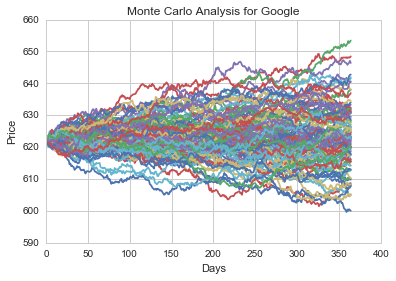

In [197]:
start_price = 622.049 #Taken from above

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [199]:
runs = 10000

simulations = np.zeros(runs)

for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

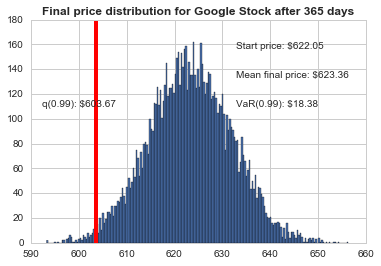

In [203]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" %days, weight='bold')